In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [179]:
crime1 = pd.read_csv('crime_data.csv',index_col= 'Unnamed: 0')

In [180]:
crime1

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [181]:
crime1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [182]:
crime1[crime1.duplicated()]

,Murder,Assault,UrbanPop,Rape


# K-Means

In [183]:
from sklearn.cluster import KMeans

In [184]:
K_scaler = StandardScaler()
scaled_crime1 = K_scaler.fit_transform(crime1)
scaled_crime1

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [185]:
wcss=[]
for i in range(1,21):
  K_model = KMeans(n_clusters = i, random_state = 42)
  K_model.fit(scaled_crime1)
  wcss.append(K_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

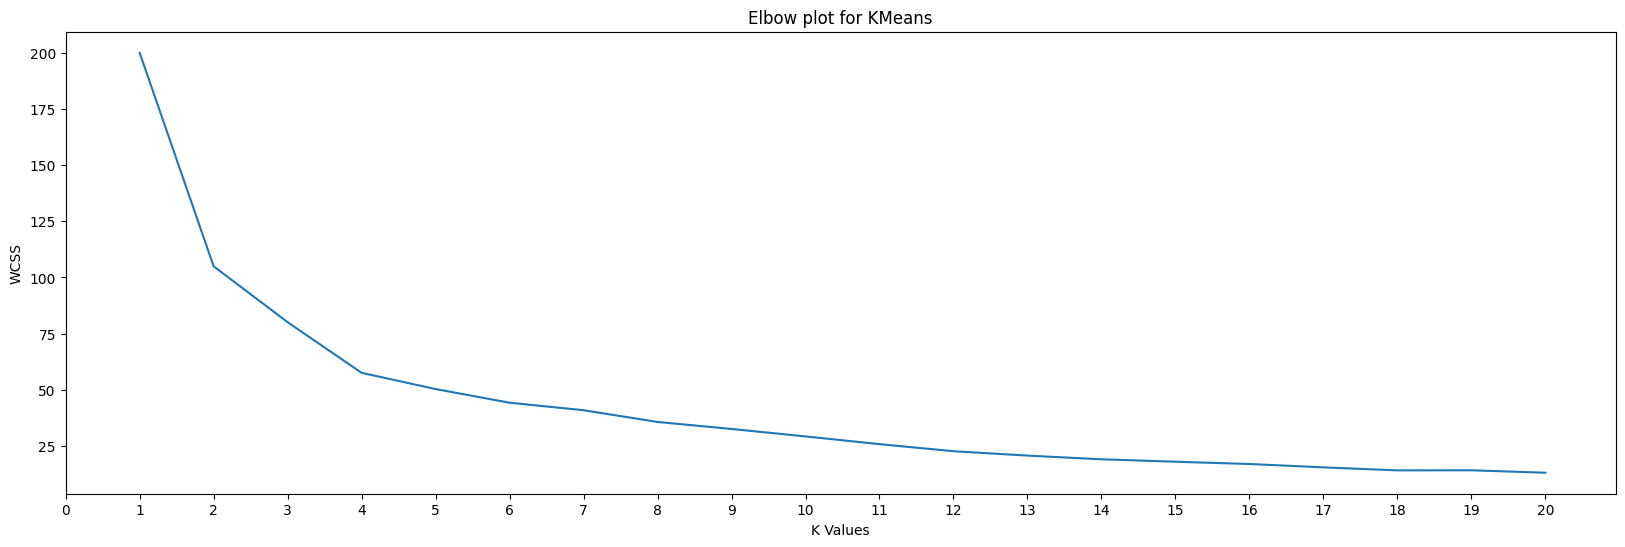

In [186]:
fig = plt.figure(figsize = (20,6))
plt.plot(range(1,21),wcss)
plt.title("Elbow plot for KMeans")
plt.xlabel('K Values')
plt.xticks(range(21))
plt.ylabel('WCSS')
plt.show()

In [187]:
final_K_model = KMeans(n_clusters = 4, random_state = 42)
final_K_model.fit(scaled_crime1)
K_labels = final_K_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [188]:
K_labels

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [189]:
crime1['K_Labels']= K_labels
crime1.head()

,Murder,Assault,UrbanPop,Rape,K_Labels
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,2


In [190]:
crime1['K_Labels'].unique()

array([1, 2, 0, 3], dtype=int32)

In [191]:
final_K_model.inertia_

57.55425863091105

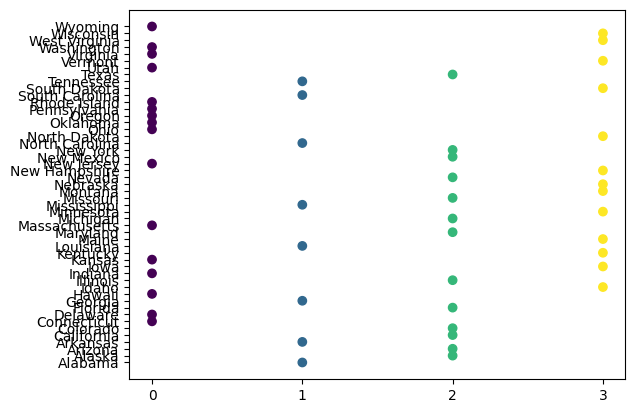

In [192]:
plt.scatter(crime1['K_Labels'], crime1.index, c= K_labels, cmap = 'viridis')
plt.xticks([0,1,2,3])
plt.show()

In [193]:
grp1 = crime1.groupby(['K_Labels'])

In [194]:
for x,y in grp1:
  print(y)
  print('_________________________________________________________________________')

               Murder  Assault  UrbanPop  Rape  K_Labels
Connecticut       3.3      110        77  11.1         0
Delaware          5.9      238        72  15.8         0
Hawaii            5.3       46        83  20.2         0
Indiana           7.2      113        65  21.0         0
Kansas            6.0      115        66  18.0         0
Massachusetts     4.4      149        85  16.3         0
New Jersey        7.4      159        89  18.8         0
Ohio              7.3      120        75  21.4         0
Oklahoma          6.6      151        68  20.0         0
Oregon            4.9      159        67  29.3         0
Pennsylvania      6.3      106        72  14.9         0
Rhode Island      3.4      174        87   8.3         0
Utah              3.2      120        80  22.9         0
Virginia          8.5      156        63  20.7         0
Washington        4.0      145        73  26.2         0
Wyoming           6.8      161        60  15.6         0
_______________________________

<ipython-input-194-53a33f4295e8>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for x,y in grp1:


In [195]:
grp1.agg(['mean','min','max'])

Murder                Assault             UrbanPop          \
               mean  min   max        mean  min  max       mean min max   
K_Labels                                                                  
0          5.656250  3.2   8.5  138.875000   46  238  73.875000  60  89   
1         13.937500  8.8  17.4  243.625000  188  337  53.750000  44  66   
2         10.815385  7.9  15.4  257.384615  178  335  76.000000  48  91   
3          3.600000  0.8   9.7   78.538462   45  120  52.076923  32  66   

               Rape              
               mean   min   max  
K_Labels                         
0         18.781250   8.3  29.3  
1         21.412500  16.1  26.9  
2         33.192308  24.0  46.0  
3         12.176923   7.3  16.5

In [196]:
silhouette_score(crime1.iloc[:,:3], K_labels)

0.20664915097135722

# Hierarchical

In [197]:
from sklearn.cluster import AgglomerativeClustering

In [198]:
crime2 = crime1.drop(['K_Labels'], axis = 1)

In [199]:
Hier_Scaler = StandardScaler()
scaled_crime2 = Hier_Scaler.fit_transform(crime2)
scaled_crime2

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

Hyperparameter Tuning

In [200]:
max_clusters = 10
silhouette_scores = np.zeros(max_clusters-1)

# Iterating over different numbers of clusters
for n_clusters in range(2, max_clusters+1):
    
    hier_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
    hier_model.fit(scaled_crime2)
    
    
    silhouette_avg = silhouette_score(scaled_crime2, hier_model.labels_)
    silhouette_scores[n_clusters-2] = silhouette_avg

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

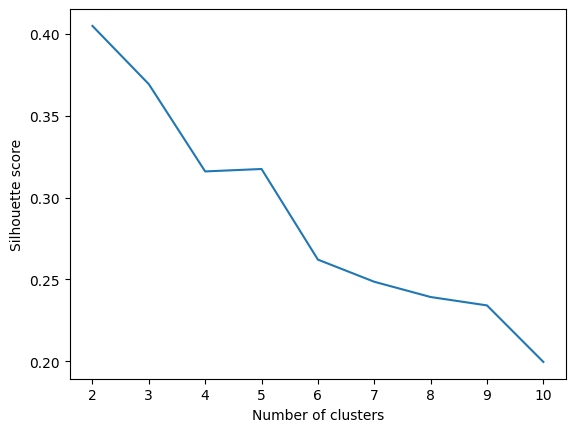

In [201]:
plt.plot(range(2, max_clusters+1), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [202]:
Hier_model = AgglomerativeClustering(n_clusters = 3,  affinity = 'euclidean', linkage = 'complete')
Hier_model.fit(scaled_crime2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [203]:
Hier_labels = Hier_model.labels_
Hier_labels

array([1, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0])

In [204]:
silhouette_score(crime2.iloc[:,:10], Hier_labels)

0.35664695430523713

In [205]:
crime2['Hier_labels'] = Hier_labels
crime2.head()

,Murder,Assault,UrbanPop,Rape,Hier_labels
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2


In [206]:
grp2 = crime2.groupby(['Hier_labels'])

In [207]:
for x,y in grp2:
  print(y)
  print('_________________________________________________________________________')

               Murder  Assault  UrbanPop  Rape  Hier_labels
Arkansas          8.8      190        50  19.5            0
Connecticut       3.3      110        77  11.1            0
Delaware          5.9      238        72  15.8            0
Hawaii            5.3       46        83  20.2            0
Idaho             2.6      120        54  14.2            0
Indiana           7.2      113        65  21.0            0
Iowa              2.2       56        57  11.3            0
Kansas            6.0      115        66  18.0            0
Kentucky          9.7      109        52  16.3            0
Maine             2.1       83        51   7.8            0
Massachusetts     4.4      149        85  16.3            0
Minnesota         2.7       72        66  14.9            0
Missouri          9.0      178        70  28.2            0
Montana           6.0      109        53  16.4            0
Nebraska          4.3      102        62  16.5            0
New Hampshire     2.1       57        56

<ipython-input-207-959cb43c91c3>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for x,y in grp2:


In [208]:
grp2.agg(['mean','min','max'])

Murder                 Assault             UrbanPop          \
                  mean   min   max        mean  min  max       mean min max   
Hier_labels                                                                   
0             5.003226   0.8   9.7  116.483871   45  238  63.838710  32  89   
1            14.087500  10.0  17.4  252.750000  188  337  53.500000  44  66   
2            11.054545   7.9  15.4  264.090909  201  335  79.090909  67  91   

                  Rape              
                  mean   min   max  
Hier_labels                         
0            16.338710   7.3  29.3  
1            24.537500  16.1  44.5  
2            32.618182  24.0  46.0

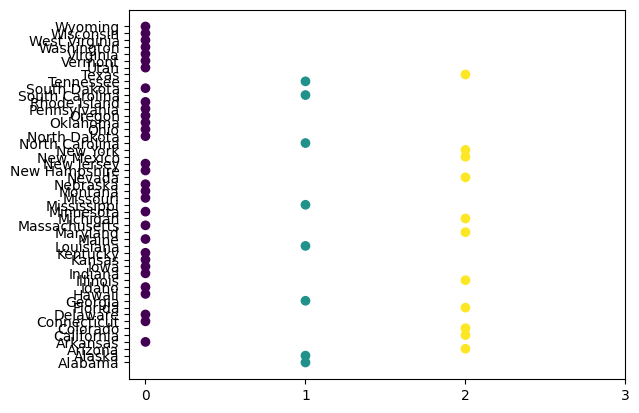

In [209]:
plt.scatter(crime2['Hier_labels'], crime2.index, c= Hier_labels, cmap = 'viridis')
plt.xticks([0,1,2,3])
plt.show()

In [210]:
from scipy.cluster import hierarchy

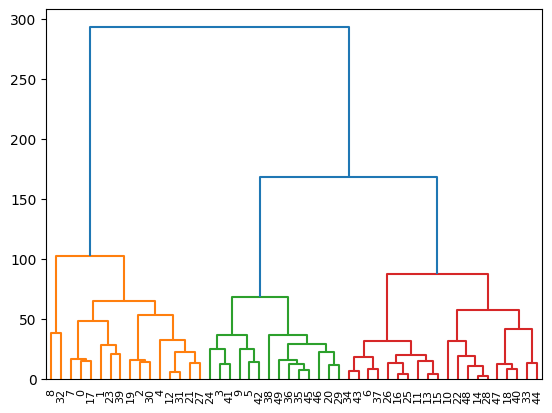

In [211]:
hr = hierarchy.linkage(crime2.iloc[:,:10], method = 'complete')
dn = hierarchy.dendrogram(hr, color_threshold= 120)

# DBSCAN

In [212]:
crime3 = crime2.drop(['Hier_labels'], axis = 1)
crime3.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [213]:
from sklearn.cluster import DBSCAN

In [214]:
db_scaler = StandardScaler()
scaled_crime3 = db_scaler.fit_transform(crime3)
scaled_crime3

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [215]:
eps=np.linspace(0.1,1,20)
min_samples=range(2,20)
sil=[]
for i in eps:
    for j in min_samples:
        cluster=DBSCAN(eps=i,min_samples=j)
        label=cluster.fit_predict(scaled_crime3)
        if len(set(label))>1:
             sil.append([i,j,silhouette_score(scaled_crime3,label)])

In [216]:
eps, min_samples, score = sorted(sil, key=lambda x:x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.266781916070482
min_samples: 5
eps: 0.9526315789473684


In [217]:
dataframe = pd.DataFrame(sil, columns=['eps','min','silhouette_score']).sort_values(['silhouette_score'],ascending = False)
dataframe

,eps,min,silhouette_score
44,0.905263,4,0.266782
45,0.905263,5,0.266782
52,0.952632,5,0.266782
62,1.000000,7,0.255260
61,1.000000,6,0.255260
...,...,...,...
7,0.526316,3,-0.184590
4,0.431579,2,-0.205784
3,0.384211,2,-0.205784
6,0.526316,2,-0.226992


In [218]:
db_model = DBSCAN(eps =0.905263	, min_samples= 4)
db_model.fit(scaled_crime3)

DBSCAN(eps=0.905263, min_samples=4)

In [219]:
db_labels = db_model.labels_
db_labels

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0])

In [220]:
crime3['DB_labels'] = db_labels
crime3

,Murder,Assault,UrbanPop,Rape,DB_labels
Alabama,13.2,236,58,21.2,-1
Alaska,10.0,263,48,44.5,-1
Arizona,8.1,294,80,31.0,-1
Arkansas,8.8,190,50,19.5,-1
California,9.0,276,91,40.6,-1
Colorado,7.9,204,78,38.7,-1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,-1
Florida,15.4,335,80,31.9,-1
Georgia,17.4,211,60,25.8,-1


In [221]:
grp3 = crime3.groupby('DB_labels')
grp3

In [222]:
for x,y in grp3:
  print(y)
  print('___________________________________________________________________')

                Murder  Assault  UrbanPop  Rape  DB_labels
Alabama           13.2      236        58  21.2         -1
Alaska            10.0      263        48  44.5         -1
Arizona            8.1      294        80  31.0         -1
Arkansas           8.8      190        50  19.5         -1
California         9.0      276        91  40.6         -1
Colorado           7.9      204        78  38.7         -1
Delaware           5.9      238        72  15.8         -1
Florida           15.4      335        80  31.9         -1
Georgia           17.4      211        60  25.8         -1
Hawaii             5.3       46        83  20.2         -1
Illinois          10.4      249        83  24.0         -1
Louisiana         15.4      249        66  22.2         -1
Maryland          11.3      300        67  27.8         -1
Massachusetts      4.4      149        85  16.3         -1
Michigan          12.1      255        74  35.1         -1
Mississippi       16.1      259        44  17.1         

In [223]:
grp3.agg(['mean','min','max'])

Murder                Assault            UrbanPop          \
            mean  min   max        mean min  max       mean min max   
DB_labels                                                             
-1          9.76  2.2  17.4  217.766667  46  337  69.533333  32  91   
 0          4.83  0.8   9.7  100.250000  45  161  59.550000  39  77   

                Rape             
                mean  min   max  
DB_labels                        
-1         25.726667  8.3  46.0  
 0         14.490000  7.3  21.4

In [224]:
crime3.head()

,Murder,Assault,UrbanPop,Rape,DB_labels
Alabama,13.2,236,58,21.2,-1
Alaska,10.0,263,48,44.5,-1
Arizona,8.1,294,80,31.0,-1
Arkansas,8.8,190,50,19.5,-1
California,9.0,276,91,40.6,-1


In [225]:
silhouette_score(crime3.iloc[:,:3], db_labels)

0.3995412004498661